In [1]:
import torch; torch.set_default_tensor_type(torch.cuda.FloatTensor)
from gprMax.utilities import detect_check_gpus; from gprMax.gprMax import api; import numpy as np; import h5py; import matplotlib.pyplot as plt; import math
detect_check_gpus([1]);import os; import time; from IPython.display import clear_output; os.getcwd(); import torch; from GPUtil import showUtilization as gpu_usage
from numba import cuda; import gc; import pycuda.driver; import random; import time; import pandas as pd; from scipy.signal import hilbert
from bayes_opt import BayesianOptimization; import plotly.graph_objects as go
def free_gpu_cache():
    gc.collect(); torch.cuda.empty_cache(); cuda.select_device(1); cuda.close(); cuda.select_device(1); gpu_usage()
    gc.collect(); torch.cuda.empty_cache(); cuda.select_device(0); cuda.close(); cuda.select_device(0); gpu_usage()
free_gpu_cache()
def moving_average(signal, window_size):
    window = np.ones(window_size) / window_size;    smoothed_signal = np.convolve(signal, window, mode='same');    return smoothed_signal

| ID | GPU | MEM |
------------------
|  0 |  0% |  3% |
|  1 |  0% |  1% |
| ID | GPU | MEM |
------------------
|  0 |  1% |  4% |
|  1 |  3% |  1% |


## Day-1

Parameters: 4.2


<Figure size 1000x200 with 0 Axes>

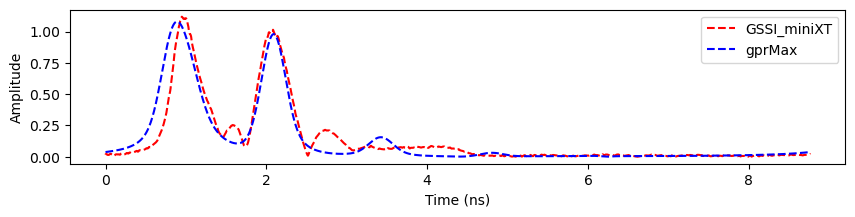

32.407948997007516

In [18]:
#DAY-2
data = pd.read_csv('FILE__092.CSV')
exp = data.iloc[100:102].mean()[1:-1];     exp = exp - np.mean(exp)
tw=8.76; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.1;  gpr_Y = pec_Y + sd1 + 0.005;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001")
        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9))
        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1))
        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n")
        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True)
    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(4.2, 0.024)
# Changing shape of the experimental signal
original_vector = -exp
new_size = sim.shape[0]  # Specify the desired new size
original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) # Create an array of indices for the new vector
E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation

# Normalize the signals
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim)))
E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2))
plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); 
plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show()
100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1)
#     vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,10), 'c1':(0,0.08)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20)
# print("Optimization completed successfully.");print(optimizer.max)

## Day-2

Parameters: 4.0


<Figure size 1000x200 with 0 Axes>

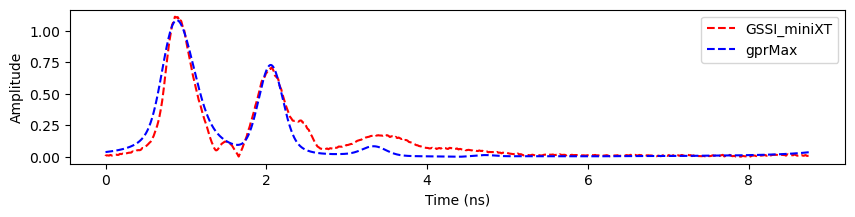

26.2436456365986

In [10]:
#DAY-2
data = pd.read_csv('FILE__093.CSV')
exp = data.iloc[62:65].mean()[1:-1];     exp = exp - np.mean(exp)
tw=8.76; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.1;  gpr_Y = pec_Y + sd1 + 0.005;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001")
        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9))
        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1))
        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n")
        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True)
    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(4., 0.04)
# Changing shape of the experimental signal
original_vector = -exp
new_size = sim.shape[0]  # Specify the desired new size
original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) # Create an array of indices for the new vector
E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
# Normalize the signals
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim)))
E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2))
plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); 
plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show()
100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1)
#     vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,10), 'c1':(0,0.08)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20)
# print("Optimization completed successfully.");print(optimizer.max)

## Day-3

Parameters: 3.3


<Figure size 1000x200 with 0 Axes>

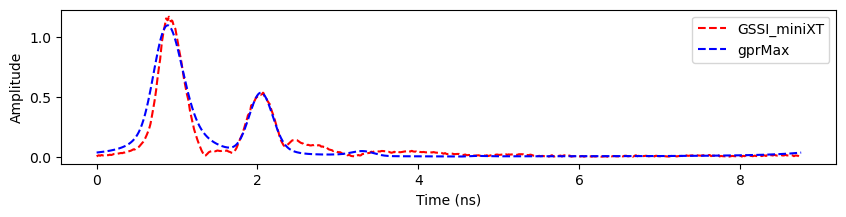

24.388787140096085

In [22]:
data = pd.read_csv('FILE__094.CSV')
exp = data.iloc[123:126].mean()[1:-1];     exp = exp - np.mean(exp)
tw=8.76; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.11;  gpr_Y = pec_Y + sd1 + 0.005;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001")
        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9))
        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1))
        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n")
        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True)
    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(3.3, 0.04)
# Changing shape of the experimental signal
original_vector = -exp
new_size = sim.shape[0]  # Specify the desired new size
original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) # Create an array of indices for the new vector
E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
# Normalize the signals
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim)))
E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2))
plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); 
plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show()
100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1)
#     vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,10), 'c1':(0,0.08)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20)
# print("Optimization completed successfully.");print(optimizer.max)

Parameters: 3.6


<Figure size 1000x200 with 0 Axes>

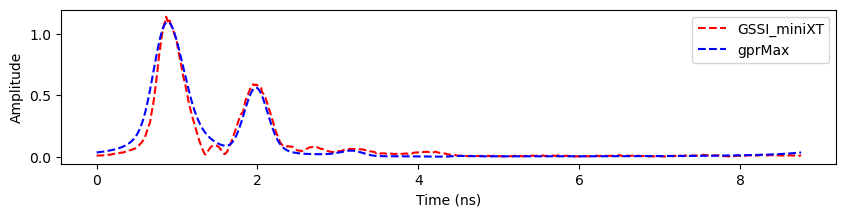

21.443474120939115

In [31]:
#DAY-4
data = pd.read_csv('FILE__095.CSV')
exp = data.iloc[100:104].mean()[1:-1];     exp = exp - np.mean(exp)
tw=8.76; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.1;  gpr_Y = pec_Y + sd1 + 0.005;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001")
        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9))
        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1))
        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n")
        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True)
    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(3.6, 0.05)
# Changing shape of the experimental signal
original_vector = -exp
new_size = sim.shape[0]  # Specify the desired new size
original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) # Create an array of indices for the new vector
E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
# Normalize the signals
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim)))
E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2))
plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); 
plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show()
100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1)
#     vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,10), 'c1':(0,0.08)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20)
# print("Optimization completed successfully.");print(optimizer.max)

## Day-6 (anomalous)

Parameters: 3


<Figure size 1000x200 with 0 Axes>

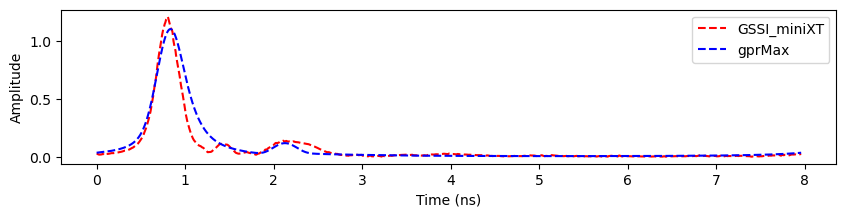

29.044352383610104

In [3]:
#DAY-6
data = pd.read_csv('FILE__097.CSV')
exp = data.iloc[190:195].mean()[1:-1];     exp = exp - np.mean(exp)
tw=7.96; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.12;  gpr_Y = pec_Y + sd1 + 0.012;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001")
        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9))
        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1))
        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n")
        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True)
    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(3, 0.1) #(8.3, 0.08)
# Changing shape of the experimental signal
original_vector = -exp
new_size = sim.shape[0]  # Specify the desired new size
original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) # Create an array of indices for the new vector
E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
# Normalize the signals
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim)))
E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2))
plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); 
plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show()
100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1)
#     vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,15), 'c1':(0,0.15)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=30, n_iter=15)
# print("Optimization completed successfully.");print(optimizer.max)

## Day-6

Parameters: 3.9


<Figure size 1000x200 with 0 Axes>

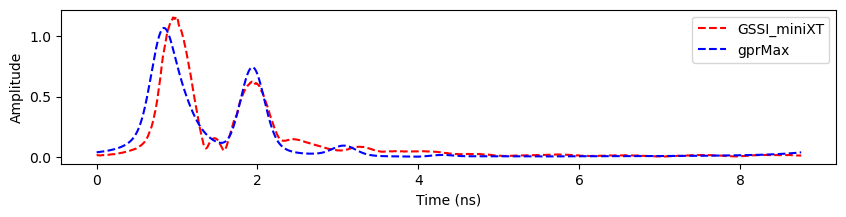

39.112275590350265

In [33]:
#DAY-7
data = pd.read_csv('FILE__103.CSV')
exp = data.iloc[100:140].mean()[1:-1];     exp = exp - np.mean(exp)
tw=8.76; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.09;  gpr_Y = pec_Y + sd1 + 0.01;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001")
        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9))
        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1))
        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n")
        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True)
    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(3.9, 0.04) #(8.3, 0.08)
# Changing shape of the experimental signal
original_vector = -exp
new_size = sim.shape[0]  # Specify the desired new size
original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) # Create an array of indices for the new vector
E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
# Normalize the signals
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim)))
E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2))
plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); 
plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show()
100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1)
#     vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,15), 'c1':(0,0.15)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=50, n_iter=30)
# print("Optimization completed successfully.");print(optimizer.max)

## Day-7

Parameters: 10.8


<Figure size 1000x200 with 0 Axes>

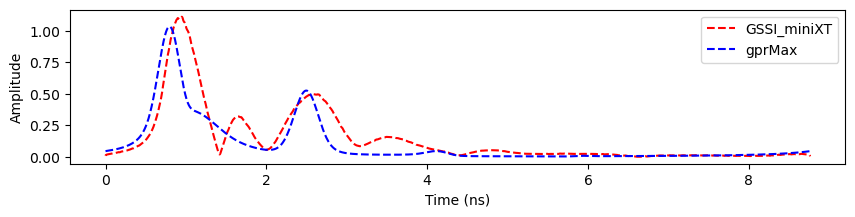

46.36072862203948

In [18]:
#DAY-8
data = pd.read_csv('FILE__105.CSV')
exp = data.iloc[100:150].mean()[1:-1];     exp = exp - np.mean(exp)
tw=8.76; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.078;  gpr_Y = pec_Y + sd1 + 0.01;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001")
        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9))
        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1))
        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n")
        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True)
    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(10.8, 0.18) #(8.3, 0.08)
# Changing shape of the experimental signal
original_vector = -exp
new_size = sim.shape[0]  # Specify the desired new size
original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) # Create an array of indices for the new vector
E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
# Normalize the signals
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim)))
E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2))
plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); 
plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show()
100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1)
#     vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(3,15), 'c1':(0,0.15)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20)
# print("Optimization completed successfully.");print(optimizer.max)

## Day-8

Parameters: 8.56


<Figure size 1000x200 with 0 Axes>

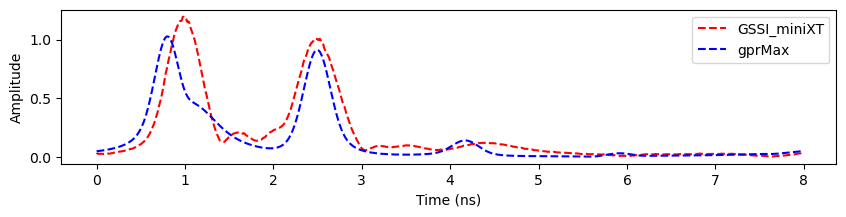

42.04773068669591

In [37]:
#DAY-9
data = pd.read_csv('FILE__109.CSV')
exp = data.iloc[110:125].mean()[1:-1];     exp = exp - np.mean(exp)
tw=7.97; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.088;  gpr_Y = pec_Y + sd1 + 0.01;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001")
        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9))
        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1))
        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n")
        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True)
    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(8.56, 0.078)
# Changing shape of the experimental signal
original_vector = -exp
new_size = sim.shape[0]  # Specify the desired new size
original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) # Create an array of indices for the new vector
E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
# Normalize the signals
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim)))
E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2))
plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); 
plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show()
100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1)
#     vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,10), 'c1':(0,0.08)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20)
# print("Optimization completed successfully.");print(optimizer.max)

## Day-9

In [7]:
#DAY-9
data = pd.read_csv('FILE__111.CSV')
exp = data.iloc[80:100].mean()[1:-1];     exp = exp - np.mean(exp)
tw=7.97; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.078;  gpr_Y = pec_Y + sd1 + 0.005;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001")
        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9))
        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1))
        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n")
        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True)
    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(8.56, 0.078)
# Changing shape of the experimental signal
original_vector = -exp
new_size = sim.shape[0]  # Specify the desired new size
original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) # Create an array of indices for the new vector
E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
# Normalize the signals
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim)))
E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2))
plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); 
plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show()
100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

def mae_func(p1, c1):
    vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1)
    vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
    return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
bounds = {'p1':(1,13), 'c1':(0,0.15)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
optimizer.maximize(init_points=40, n_iter=20)
print("Optimization completed successfully.");print(optimizer.max)

Parameters: 7.67509722425175
| 60        | -44.11    | 0.1483    | 7.675     |
Optimization completed successfully.
{'target': -29.42700712132807, 'params': {'c1': 0.04382169728028272, 'p1': 5.3963421195243}}


## Day-11

Parameters: 5


<Figure size 1000x200 with 0 Axes>

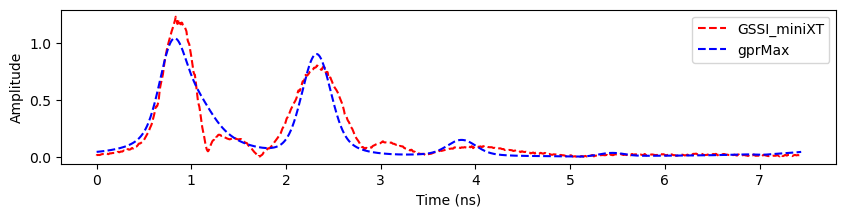

25.86757410853286

In [4]:
#DAY-11
data = pd.read_csv('FILE__151.CSV'); exp = data.iloc[125:126].mean()[1:-1];     exp = exp - np.mean(exp)
tw=7.44; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.105;  gpr_Y = pec_Y + sd1 + 0.01;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001");        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9));        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1));        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n");        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True);    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(5, 0.03)
# Changing shape of the experimental signal
original_vector = -exp; new_size = sim.shape[0] ; original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) ; E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim))); E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2)); plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show(); 100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1);    vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,10), 'c1':(0,0.08)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20); print("Optimization completed successfully.");print(optimizer.max)

## Day-12

Parameters: 5


<Figure size 1000x200 with 0 Axes>

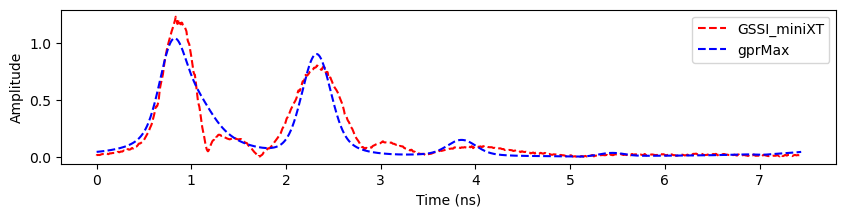

25.86757410853286

In [22]:
#DAY-12
data = pd.read_csv('FILE__151.CSV'); exp = data.iloc[125:126].mean()[1:-1];     exp = exp - np.mean(exp)
tw=7.44; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.105;  gpr_Y = pec_Y + sd1 + 0.01;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001");        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9));        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1));        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n");        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True);    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(5, 0.03)
# Changing shape of the experimental signal
original_vector = -exp; new_size = sim.shape[0] ; original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) ; E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim))); E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2)); plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show(); 100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1);    vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,10), 'c1':(0,0.08)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20); print("Optimization completed successfully.");print(optimizer.max)

## Day-13

Parameters: 4


<Figure size 1000x200 with 0 Axes>

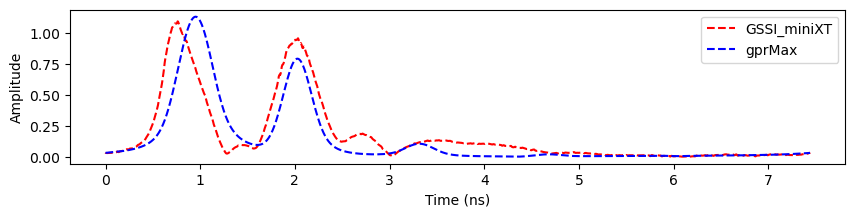

47.86595536114762

In [14]:
#DAY-13
data = pd.read_csv('FILE__152.CSV'); exp = data.iloc[25:30].mean()[1:-1];     exp = exp - np.mean(exp)
tw=7.44; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.10;  gpr_Y = pec_Y + sd1 + 0.0;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001");        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9));        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1));        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n");        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True);    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(3.75, 0.03)
# Changing shape of the experimental signal
original_vector = -exp; new_size = sim.shape[0] ; original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) ; E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim))); E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2)); plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show(); 100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1);    vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,10), 'c1':(0,0.08)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20); print("Optimization completed successfully.");print(optimizer.max)

## Day-14

Parameters: 9.3


<Figure size 1000x200 with 0 Axes>

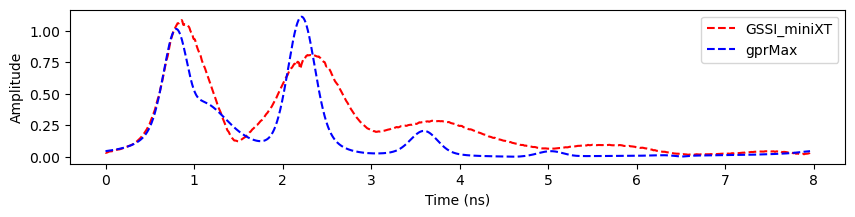

43.58770484892096

In [12]:
#DAY-14
data = pd.read_csv('FILE__153.CSV'); exp = data.iloc[135:150].mean()[1:-1];     exp = exp - np.mean(exp)
tw=7.96; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.07;  gpr_Y = pec_Y + sd1 + 0.01;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001");        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9));        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1));        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n");        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True);    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(9.3, 0.09)
# Changing shape of the experimental signal
original_vector = -exp; new_size = sim.shape[0] ; original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) ; E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim))); E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2)); plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show(); 100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1);    vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(1,10), 'c1':(0,0.15)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20); print("Optimization completed successfully.");print(optimizer.max)

## Day-10/17/2023

Parameters: 16.5


<Figure size 1000x200 with 0 Axes>

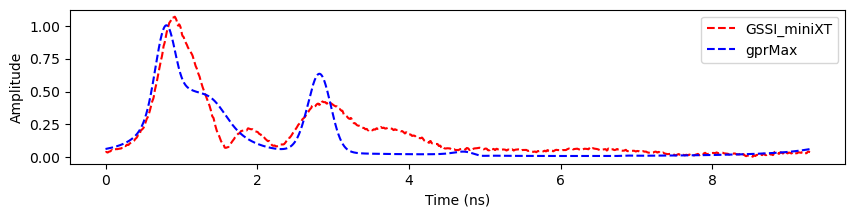

39.79268474518067

In [18]:
#DAY-
data = pd.read_csv('FILE__156.CSV'); exp = data.iloc[127:130].mean()[1:-1];     exp = exp - np.mean(exp)
tw=9.29; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.075;  gpr_Y = pec_Y + sd1 + 0.005;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.001\n#dx_dy_dz: 0.001 0.001 0.001");        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9));        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.001 mat1".format(pec_Y, pec_Y + sd1));        f.write("\n#box: 0 {} 0 0.30 {} 0.001 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.001  0.001 0.001 0.001 ML n\n");        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True);    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(16.5, 0.3)
# Changing shape of the experimental signal
original_vector = -exp; new_size = sim.shape[0] ; original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) ; E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim))); E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2)); plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show(); 100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1);    vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(5,20), 'c1':(0,0.25)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20); print("Optimization completed successfully.");print(optimizer.max)

## Day-10/18/2023

Parameters: 10.2


<Figure size 1000x200 with 0 Axes>

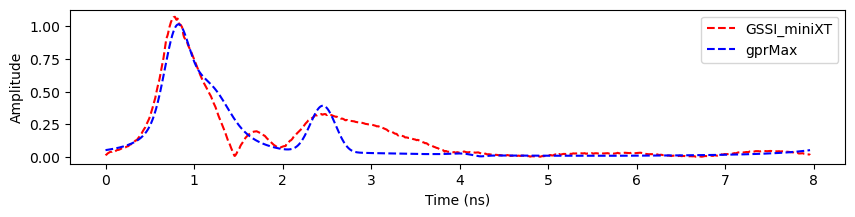

31.818303473629886

In [25]:
#DAY-
data = pd.read_csv('FILE__157.CSV'); exp = data.iloc[130:140].mean()[1:-1];     exp = exp - np.mean(exp)
tw=7.96; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.08;  gpr_Y = pec_Y + sd1 + 0.005;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.0005\n#dx_dy_dz: 0.0005 0.0005 0.0005");        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9));        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.0005 mat1".format(pec_Y, pec_Y + sd1));        f.write("\n#box: 0 {} 0 0.30 {} 0.0005 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.0005  0.0005 0.0005 0.0005 ML n\n");        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True);    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(10.2, 0.25)
# Changing shape of the experimental signal
original_vector = -exp; new_size = sim.shape[0] ; original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) ; E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim))); E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2)); plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show(); 100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1);    vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(5,20), 'c1':(0,0.25)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20); print("Optimization completed successfully.");print(optimizer.max)

## Day-10/19/2023

In [28]:
#DAY-
data = pd.read_csv('FILE__158.CSV'); exp = data.iloc[120:124].mean()[1:-1];     exp = exp - np.mean(exp)
tw=7.96; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.085;  gpr_Y = pec_Y + sd1 + 0.005;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.0005\n#dx_dy_dz: 0.0005 0.0005 0.0005");        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9));        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.0005 mat1".format(pec_Y, pec_Y + sd1));        f.write("\n#box: 0 {} 0 0.30 {} 0.0005 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.0005  0.0005 0.0005 0.0005 ML n\n");        f.close()     
    api("Noise.in", geometry_only=False, gpu=[1]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True);    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(12, 0.25)
# Changing shape of the experimental signal
original_vector = -exp; new_size = sim.shape[0] ; original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) ; E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim))); E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2)); plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show(); 100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

def mae_func(p1, c1):
    vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1);    vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
    return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
bounds = {'p1':(5,20), 'c1':(0,0.25)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
optimizer.maximize(init_points=40, n_iter=20); print("Optimization completed successfully.");print(optimizer.max)

Parameters: 5.400450493349608
| 60        | -76.47    | 0.03922   | 5.4       |
Optimization completed successfully.
{'target': -38.501715403022175, 'params': {'c1': 0.2485900894998375, 'p1': 12.029795750576424}}


## Day-10/27/2023 (after rainfall)

Parameters: 7.1


<Figure size 1000x200 with 0 Axes>

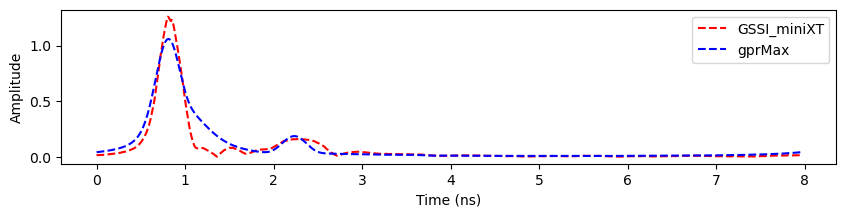

28.904723259434558

In [45]:
#DAY-
data = pd.read_csv('FILE__017.CSV'); exp = data.iloc[200:225].mean()[2:-1];     exp = exp - np.mean(exp)
tw=7.96; df = 1/tw; fd = (exp.shape[0]-1)*df;    dt = 1/fd; t = np.arange(0,tw+dt,dt);  t = t*1e-9; plt.figure(figsize=(10, 2));

##Simulation
tw=tw*1e-9; pec_Y = 0.06; sd1=0.083;  gpr_Y = pec_Y + sd1 + 0.01;
def model_1L1P(p1, c1):
    with open("Noise.in", "w") as f:
        f.write("#title: Soil_15cm + PEC \n#domain: 0.30 0.40 0.0005\n#dx_dy_dz: 0.0005 0.0005 0.0005");        f.write("\n#time_window: {} \n#material: {} {} 1 0 mat1".format(tw, p1, c1))
        f.write("\n#waveform: gaussian 1 {} my_wave".format(1.5778e9));        f.write("\n#hertzian_dipole: z 0.12 {} 0 my_wave\n#rx: 0.18 {} 0".format(gpr_Y, gpr_Y))
        f.write("\n#box: 0 {} 0 0.3 {} 0.0005 mat1".format(pec_Y, pec_Y + sd1));        f.write("\n#box: 0 {} 0 0.30 {} 0.0005 pec".format(pec_Y-0.005, pec_Y))
        f.write("\n#geometry_view: 0 0 0  0.30 0.40 0.0005  0.0005 0.0005 0.0005 ML n\n");        f.close()     
    api("Noise.in", geometry_only=False, gpu=[0]);    hf2 = h5py.File("Noise.out",'r', libver='latest', swmr=True);    Ascan = hf2['rxs/rx1/Ez'][:];  hf2.close();    free_gpu_cache();    clear_output();    print('Parameters:', p1)#
    return Ascan
sim = model_1L1P(7.1, 0.23)
# Changing shape of the experimental signal
original_vector = -exp; new_size = sim.shape[0] ; original_indices = np.arange(original_vector.size) # Create an array of indices for the original vector
new_indices = np.linspace(0, original_indices.max(), new_size) ; E_new = np.interp(new_indices, original_indices, original_vector) # Perform linear interpolation
E_new_normalized = E_new/(np.max(abs(E_new)));      sim_normalized = sim/(np.max(abs(sim))); E_new_normalized = np.abs(hilbert(E_new_normalized));   sim_normalized = np.abs(hilbert(sim_normalized)) # HILBERT TRANSFORM

# Plot the two results
df = 1/tw; fd = (E_new_normalized.shape[0]-1)*df;    dt = 1/fd;  t = np.arange(0,tw+dt,dt);  t = t*1e9; plt.figure(figsize=(10, 2)); plt.plot(t,E_new_normalized,color='red',label='GSSI_miniXT', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude');    plt.title('');
plt.plot(t,sim_normalized,color='blue',label='gprMax', linestyle='--'); plt.xlabel('Time (ns)'); plt.ylabel('Amplitude'); plt.legend(); plt.show(); 100*np.sqrt(np.sum((E_new_normalized - sim_normalized)**2))/(np.sqrt(np.sum(E_new_normalized**2)))

# def mae_func(p1, c1):
#     vector1 = E_new_normalized;    vector2 = model_1L1P(p1, c1);    vector2 = np.abs(hilbert(vector2/(np.max(abs(vector2)))))
#     return -100*np.sqrt(np.sum((vector1 - vector2)**2))/(np.sqrt(np.sum(vector1**2)))
# bounds = {'p1':(5,20), 'c1':(0,0.25)}; optimizer = BayesianOptimization(f=mae_func, pbounds=bounds, random_state=42)
# optimizer.maximize(init_points=40, n_iter=20); print("Optimization completed successfully.");print(optimizer.max)